#### Clustering Text using KMeans

|Title|Description|
|-|-|
|Reference|[Article](https://medium.com/@evertongomede/clustering-text-in-natural-language-processing-unveiling-patterns-and-insights-8c3cd137b135#:~:text=Text%20Clustering%20Methodologies&text=K%2DMeans%20Clustering%3A%20K%2D,a%20group%20of%20similar%20documents.)|
|Purpose|Learn how to use KMeans algorithm for text clustering|
|Library|skikit-learn|
|Learning type|Unsupervised|
|Learning Algorithm|KMeans|
|Text Vectorizer|TF-IDF ([term frequency-inverse document frequency](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html))|
|Dimensionality reduction algorithm|TruncatedSVD ([Singular Value Decomposition](https://www.youtube.com/watch?v=nbBvuuNVfco))|
|Dataset|../datasets/dvatch_extract2.csv|
|Visualization|matplotlib|
|Metric|inertia & number of clusters|

#### Import required libraries

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import pandas as pd

#### Dataset

In [2]:
df = pd.read_csv("../datasets/dvatch_extract2.csv")
df.head()

,Unnamed: 0,text
0,0,вывод вооружение запорожский аэс требовать укр...
1,1,москва мужчина угрожать паяльный лампа требова...
2,2,сотрудник украинский госбюро расследование про...
3,3,разведка рассказать сми встречать фронт украин...
4,4,год европа жить российский нефть — постпред рф...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40869 entries, 0 to 40868
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  40869 non-null  int64 
 1   text        40861 non-null  object
dtypes: int64(1), object(1)
memory usage: 638.7+ KB


In [11]:
df.dropna(inplace=True)

In [12]:
print(df.text[1])

москва мужчина угрожать паяльный лампа требовать пароль криптокошелькать ночь пятница полиция обратиться летний мужчина молодой человек заявить вечером улица берзарина возле дом напасть несколько преступник бандит надеть голова мешок связать рука жгут затолкать фургон повезти неизвестный направление путь бандит забрать айфон мобильный версия криптокошелёк btc преступник угроза расправа применение паяльный лампа заставить назвать пароль кошелёк высадить лес красногорский район московский областипострадать остановить такси связаться жена обратиться полиция сумма ущерб устанавливаться — мкfomopress


#### Vectorization

In [13]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df.text)

In [14]:
tfidf_matrix

<40861x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 451170 stored elements in Compressed Sparse Row format>

#### Dimensionality reduction

In [15]:
lsa = TruncatedSVD(n_components=2)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

In [16]:
lsa_matrix

array([[ 0.15471641,  0.06279831],
       [ 0.17873269, -0.20513745],
       [ 0.1299992 , -0.04654278],
       ...,
       [ 0.17464683, -0.1039512 ],
       [ 0.1758782 ,  0.06769051],
       [ 0.08752516,  0.04911466]])

#### KMeans clustering

Inertia: 263.0510488229112; N_clusters: 2
Inertia: 163.86913485530937; N_clusters: 3
Inertia: 123.64619809849984; N_clusters: 4
Inertia: 99.50012168570866; N_clusters: 5
Inertia: 84.31913068092203; N_clusters: 6
Inertia: 73.00855998853183; N_clusters: 7
Inertia: 64.4390946149459; N_clusters: 8
Inertia: 57.99396191688193; N_clusters: 9
Inertia: 51.91345100377054; N_clusters: 10
Inertia: 47.92635571102918; N_clusters: 11
Inertia: 44.438407683604595; N_clusters: 12
Inertia: 41.078044788686334; N_clusters: 13
Inertia: 38.24157590750144; N_clusters: 14
Inertia: 35.81149331769625; N_clusters: 15
Inertia: 33.85628267890114; N_clusters: 16
Inertia: 31.865735778977104; N_clusters: 17
Inertia: 30.155687873619563; N_clusters: 18
Inertia: 28.45988165256758; N_clusters: 19
Inertia: 27.149944377712576; N_clusters: 20
Inertia: 25.937398329379192; N_clusters: 21
Inertia: 24.866160429070515; N_clusters: 22
Inertia: 23.721577849584286; N_clusters: 23
Inertia: 22.81033544525001; N_clusters: 24
Inertia: 2

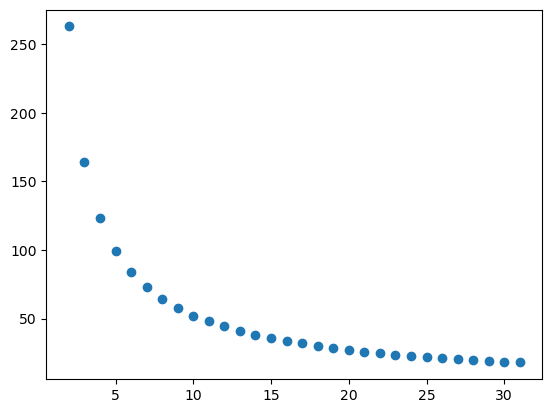

In [26]:
inertias = []

for k in range(2, 32, 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(lsa_matrix)
    inertias.append(kmeans.inertia_)

    print(f"Inertia: {kmeans.inertia_}; N_clusters: {k}")

plt.scatter(x=range(2, 32, 1), y =inertias)

In [28]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(lsa_matrix)

KMeans(n_clusters=10)

#### Visualize Cluster

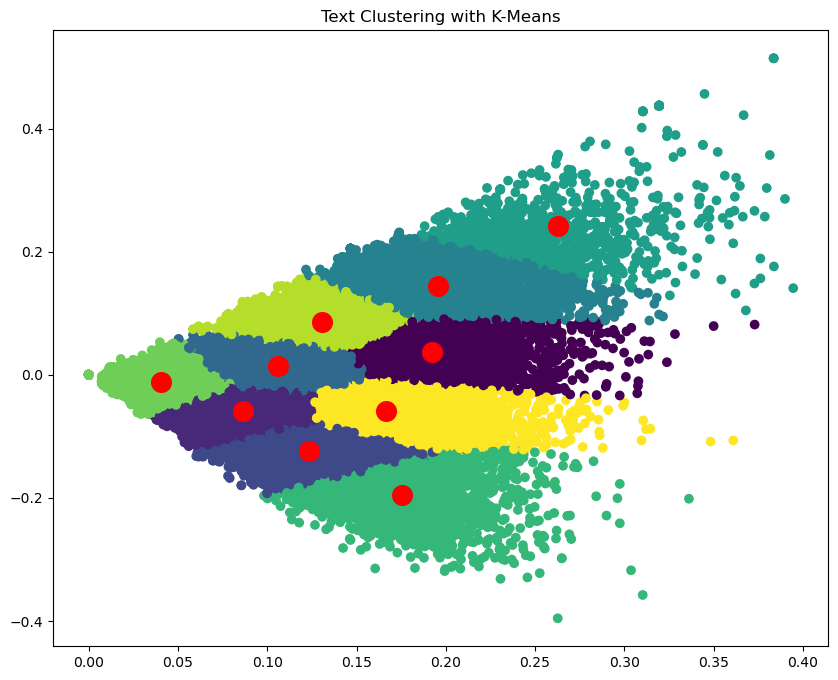

In [29]:
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1,], s=200, c='red')
plt.title("Text Clustering with K-Means")
plt.show()